In [1]:
import tensorflow as tf
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Load the LFW dataset using TensorFlow
lfw_dataset = fetch_lfw_people()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lfw_dataset.data, lfw_dataset.target, test_size=0.2, random_state=42)

# Create a random forest classifier
rf_classifier = clf = RandomForestClassifier(max_depth=2, random_state=0)



2024-03-06 11:04:46.452309: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-06 11:04:46.487644: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 11:04:46.487689: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 11:04:46.489034: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-06 11:04:46.494879: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-06 11:04:46.495817: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [8]:
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)



Accuracy: 0.03702304495655459


In [25]:
X_train[0].shape

(2914,)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()


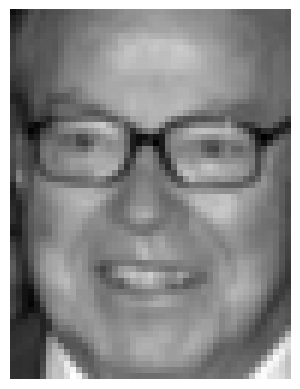

In [27]:
import matplotlib.pyplot as plt

# Reshape the first image
first_image = X_train[2].reshape(62, 47)

# Plot the first image
plt.imshow(first_image, cmap='gray')
plt.axis('off')
plt.show()


In [30]:
# Define the CNN model architecture
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(62, 47, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(lfw_dataset.target_names), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train.reshape(-1, 62, 47, 1), y_train, epochs=10, validation_data=(X_test.reshape(-1, 62, 47, 1), y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test.reshape(-1, 62, 47, 1), y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Generate classification report
y_pred = model.predict_classes(X_test.reshape(-1, 62, 47, 1))
report = classification_report(y_test, y_pred, target_names=lfw_dataset.target_names)
print(report)


ValueError: Input 0 of layer "conv2d_26" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 5749)